In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import lightgbm as lgb
from scipy import stats
from scipy.stats import norm, skew
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
import Visualization
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import IsolationForest
from IPython.core.display import display
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib
%matplotlib inline
sns.set_palette("husl")
color = sns.set_palette("husl")
#https://www.kaggle.com/jpmiller/patterns-of-missing-data
#https://medium.com/moonshot/onehotencoder-vs-labelencoder-183b3d62cb

#https://www.kaggle.com/ogrellier/feature-selection-with-null-importances
#https://www.kaggle.com/kingychiu/home-credit-eda-distributions-and-outliers
#https://www.kaggle.com/aantonova/797-lgbm-and-bayesian-optimization
# https://blog.amedama.jp/entry/2018/08/18/233841
#https://www.kaggle.com/aantonova/797-lgbm-and-bayesian-optimization

#https://qiita.com/hik0107/items/9b6e1e989f4eaefdc31d

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/Users/ranmarusato/.matplotlib/matplotlibrc", line #629
  (fname, cnt))
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationW

# データのインポート

In [2]:
train = pd.read_csv("input/application_train.csv")
test = pd.read_csv("input/application_test.csv")

In [36]:
label = pd.read_csv("input/application_train.csv")

In [37]:
y = label .pop('TARGET')

# データ型の取得

In [3]:
categorical_feats = [
    _f for _f in train.columns if train[_f].dtypes == object
]

In [4]:
index = train.isnull().sum()[train.isnull().sum()>1].index

# 欠損値の相関

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


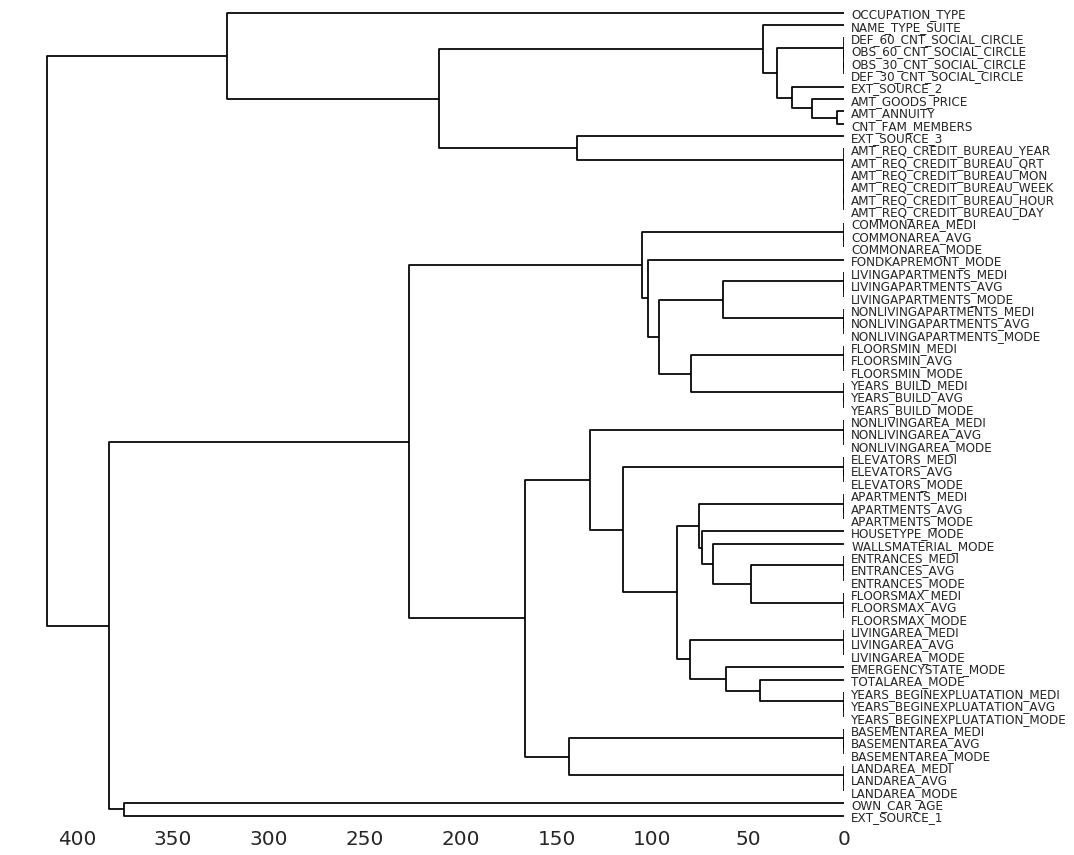

In [5]:
missing_data = train[index]
msno.dendrogram(missing_data, inline=True, fontsize=12, figsize=(15,15))

In [9]:
#欠損値の数
total_nans = train.isnull().sum()

In [10]:

# 欠損の割合
nan_precents = (train.isnull().sum()/train.isnull().count()*100)
feature_overview_df  = pd.concat([total_nans, nan_precents], axis=1, keys=['NaN Count', 'NaN Pencent'])

In [6]:
# データ型
feature_overview_df['Type'] = [train[c].dtype for c in feature_overview_df.index]
pd.set_option('display.max_rows', None)
display(feature_overview_df)
pd.set_option('display.max_rows', 20)

,NaN Count,NaN Pencent,Type
SK_ID_CURR,0,0.000000,int64
TARGET,0,0.000000,int64
NAME_CONTRACT_TYPE,0,0.000000,object
CODE_GENDER,0,0.000000,object
FLAG_OWN_CAR,0,0.000000,object
FLAG_OWN_REALTY,0,0.000000,object
CNT_CHILDREN,0,0.000000,int64
AMT_INCOME_TOTAL,0,0.000000,float64
AMT_CREDIT,0,0.000000,float64
AMT_ANNUITY,12,0.003902,float64


[Feature Generation] Adding IS_NAN features for each column

In [11]:
# 欠損値の数のデータフレームを作成
a = pd.DataFrame()

In [311]:
for column in train.columns:
    if train[column].isnull().sum() == 0:
        continue
        #欠損している値をTrueで返す
    a['is_nan_'+column] = train[column].isnull()

In [312]:
all_application_is_nan_df

,is_nan_DAYS_BIRTH,is_nan_DAYS_EMPLOYED,is_nan_DAYS_REGISTRATION,is_nan_DAYS_ID_PUBLISH,is_nan_DAYS_LAST_PHONE_CHANGE,target
2,1,1,1,1,1,0
3,1,1,1,1,1,0
4,1,1,1,1,1,0
5,1,1,1,1,1,0
7,1,1,1,1,1,0
8,1,0,1,1,0,0
9,1,1,1,1,1,0
10,1,1,1,1,1,0
11,1,0,1,1,1,0
16,1,1,1,1,1,0


In [313]:
# 欠損値の数のデータフレームを作成
all_application_is_nan_df = pd.DataFrame()

for column in train.columns:
    if train[column].isnull().sum() == 0:
        continue
        #欠損している値をTrueで返す
    all_application_is_nan_df['is_nan_'+column] = train[column].isnull()
    #True =1 False:0に変換する
    all_application_is_nan_df['is_nan_'+column] = all_application_is_nan_df['is_nan_'+column].map(lambda v: 1 if v else 0)
# 目的変数を追加
all_application_is_nan_df['target'] = train['TARGET']
#ブーリアンのインデックス指定。nullはfalseで指定しない
all_application_is_nan_df = all_application_is_nan_df[pd.notnull(all_application_is_nan_df['target'])]

In [314]:
all_application_is_nan_df

,is_nan_AMT_ANNUITY,is_nan_AMT_GOODS_PRICE,is_nan_NAME_TYPE_SUITE,is_nan_OWN_CAR_AGE,is_nan_OCCUPATION_TYPE,is_nan_CNT_FAM_MEMBERS,is_nan_EXT_SOURCE_1,is_nan_EXT_SOURCE_2,is_nan_EXT_SOURCE_3,is_nan_APARTMENTS_AVG,...,is_nan_OBS_60_CNT_SOCIAL_CIRCLE,is_nan_DEF_60_CNT_SOCIAL_CIRCLE,is_nan_DAYS_LAST_PHONE_CHANGE,is_nan_AMT_REQ_CREDIT_BUREAU_HOUR,is_nan_AMT_REQ_CREDIT_BUREAU_DAY,is_nan_AMT_REQ_CREDIT_BUREAU_WEEK,is_nan_AMT_REQ_CREDIT_BUREAU_MON,is_nan_AMT_REQ_CREDIT_BUREAU_QRT,is_nan_AMT_REQ_CREDIT_BUREAU_YEAR,target
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,1,1,...,0,0,0,1,1,1,1,1,1,0
4,0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,1,0,1,1,...,0,0,0,1,1,1,1,1,1,0


The importance of the missing values

In [315]:
Y = all_application_is_nan_df.pop('target')
X = all_application_is_nan_df

train_X, valid_X, train_Y, valid_Y = train_test_split(X, Y, test_size=0.2, random_state=2018)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


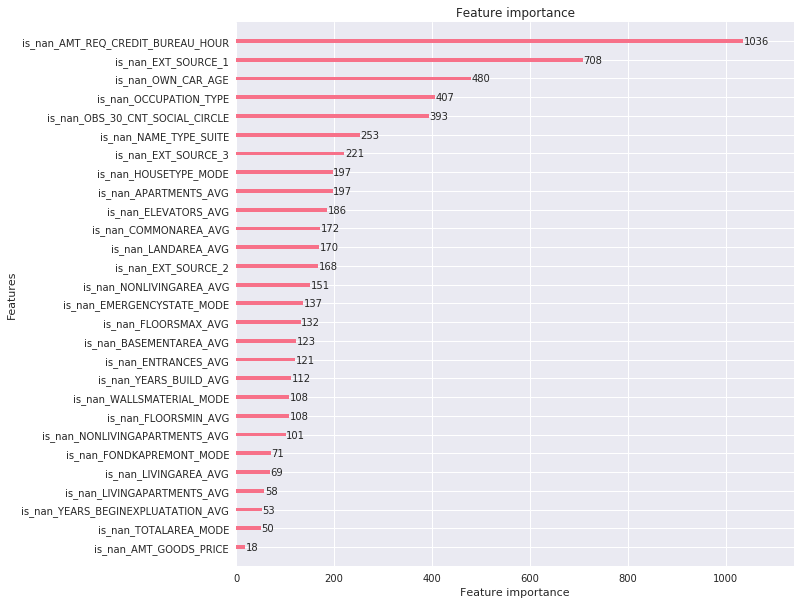

In [316]:
clf = LGBMClassifier(n_estimators=200, learning_rate=0.01)
clf.fit(
        train_X,
        train_Y,
        eval_set=[(train_X, train_Y), (valid_X, valid_Y)],
        eval_metric='auc',
        early_stopping_rounds=50,
        verbose=False
       )
plot_importance(clf, figsize=(10,10))

- 応募する前の１時間あたりの信用調査回数  
- クライアントの車の年数  
- 職種  
- 融資を申請していたときにクライアントに同行していた人  
- 30日以上延滞（支払遅延）のクライアントのソーシャルサークル（友人、家族...）  

# a

In [8]:
train.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      163910
1.0       48783
2.0       29808
3.0       20322
4.0       14143
5.0        9553
6.0        6453
7.0        4390
8.0        2967
9.0        2003
          ...  
23.0         15
24.0         11
25.0         11
27.0          5
26.0          3
30.0          2
28.0          1
348.0         1
29.0          1
47.0          1
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 33, dtype: int64

# カテゴリ変数の欠損値を把握

In [153]:
train[categorical_feats].isnull().sum()[train[categorical_feats].isnull().sum() >=1]

NAME_TYPE_SUITE          1292
OCCUPATION_TYPE         96391
FONDKAPREMONT_MODE     210295
HOUSETYPE_MODE         154297
WALLSMATERIAL_MODE     156341
EMERGENCYSTATE_MODE    145755
dtype: int64

# 分布をみて欠損値の埋め方を決定する

In [154]:
train.NAME_TYPE_SUITE.value_counts()/train.NAME_TYPE_SUITE.value_counts().sum()

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

# 最頻値で埋める

In [155]:
train.OCCUPATION_TYPE.value_counts()/train.OCCUPATION_TYPE.value_counts().sum()

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

# 中央値で埋める

In [156]:
train.FONDKAPREMONT_MODE.value_counts()/train.FONDKAPREMONT_MODE.value_counts().sum()

reg oper account         0.759443
reg oper spec account    0.124259
not specified            0.058499
org spec account         0.057799
Name: FONDKAPREMONT_MODE, dtype: float64

# 最頻値で埋める

In [157]:
train.HOUSETYPE_MODE.value_counts()/train.HOUSETYPE_MODE.value_counts().sum()

block of flats      0.982306
specific housing    0.009784
terraced house      0.007911
Name: HOUSETYPE_MODE, dtype: float64

# 最頻値で埋める

In [158]:
train.WALLSMATERIAL_MODE.value_counts()/train.WALLSMATERIAL_MODE.value_counts().sum()

Panel           0.436859
Stone, brick    0.428756
Block           0.061209
Wooden          0.035470
Mixed           0.015188
Monolithic      0.011768
Others          0.010749
Name: WALLSMATERIAL_MODE, dtype: float64

# 中央値で埋める

In [159]:
train.EMERGENCYSTATE_MODE.value_counts()/train.EMERGENCYSTATE_MODE.value_counts().sum()

No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64

# 最頻値で埋める

#  カテゴリ変数の欠損値処理

In [317]:
#最頻値　
mode = ['NAME_TYPE_SUITE','FONDKAPREMONT_MODE','EMERGENCYSTATE_MODE','HOUSETYPE_MODE','OCCUPATION_TYPE']

In [318]:
train[mode]

,NAME_TYPE_SUITE,FONDKAPREMONT_MODE,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,OCCUPATION_TYPE
0,Unaccompanied,reg oper account,No,block of flats,Laborers
1,Family,reg oper account,No,block of flats,Core staff
2,Unaccompanied,NaN,NaN,NaN,Laborers
3,Unaccompanied,NaN,NaN,NaN,Laborers
4,Unaccompanied,NaN,NaN,NaN,Core staff
5,"Spouse, partner",NaN,NaN,NaN,Laborers
6,Unaccompanied,NaN,NaN,NaN,Accountants
7,Unaccompanied,NaN,NaN,NaN,Managers
8,Children,NaN,NaN,NaN,NaN
9,Unaccompanied,NaN,NaN,NaN,Laborers


In [319]:
for f in mode:
    train[f] = train[f].fillna(train[f].mode().iloc[0])
    test[f] = test[f].fillna(test[f].mode().iloc[0])

In [349]:
train.isnull().sum()[train.isnull().sum()>1]

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
APARTMENTS_AVG                156061
                               ...  
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 66, dtype: int64

In [321]:
# 中央値処理
median = ['WALLSMATERIAL_MODE','FONDKAPREMONT_MODE']

In [3]:
# 一旦ファクタライズ
for column in median:
    labels, uniques = pd.factorize(train[column])
    labels_test, uniques = pd.factorize(test[column])
    train[column] = labels
    test[column] = labels_test

NameError: name 'median' is not defined

# 欠損値が0になっていることを確認

In [323]:
train.isnull().sum()[train.isnull().sum()>=1]

AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
OWN_CAR_AGE                    202929
CNT_FAM_MEMBERS                     2
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
APARTMENTS_AVG                 156061
BASEMENTAREA_AVG               179943
YEARS_BEGINEXPLUATATION_AVG    150007
                                ...  
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
DAYS_LAST_PHONE_CHANGE              1
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_YEAR      41519
Length: 61, dtype: int64

In [324]:
test.isnull().sum()[test.isnull().sum()>=1]

AMT_ANNUITY                       24
OWN_CAR_AGE                    32312
EXT_SOURCE_1                   20532
EXT_SOURCE_2                       8
EXT_SOURCE_3                    8668
APARTMENTS_AVG                 23887
BASEMENTAREA_AVG               27641
YEARS_BEGINEXPLUATATION_AVG    22856
YEARS_BUILD_AVG                31818
COMMONAREA_AVG                 33495
                               ...  
OBS_30_CNT_SOCIAL_CIRCLE          29
DEF_30_CNT_SOCIAL_CIRCLE          29
OBS_60_CNT_SOCIAL_CIRCLE          29
DEF_60_CNT_SOCIAL_CIRCLE          29
AMT_REQ_CREDIT_BUREAU_HOUR      6049
AMT_REQ_CREDIT_BUREAU_DAY       6049
AMT_REQ_CREDIT_BUREAU_WEEK      6049
AMT_REQ_CREDIT_BUREAU_MON       6049
AMT_REQ_CREDIT_BUREAU_QRT       6049
AMT_REQ_CREDIT_BUREAU_YEAR      6049
Length: 58, dtype: int64

# 数値変数の欠損値処理

# 数値変数を取得

In [325]:
num_feats = [
    _f for _f in train.drop('TARGET',axis = 1).columns if train[_f].dtypes != object
]

# 数値変数の欠損値処理

In [326]:
for f in num_feats:

    train[f] = train[f].fillna(train[f].median())
    test[f] = test[f].fillna(test[f].median())

In [327]:
#数値変数の欠損が０になっているか確認

In [328]:
train[num_feats].isnull().sum()[train[num_feats].isnull().sum()>0]

Series([], dtype: int64)

In [329]:
# missing_data_train = train.isnull().sum()[train.isnull().sum() >=1].index
# missing_data_test = test.isnull().sum()[test.isnull().sum() >=1].index

In [330]:
for f in num_feats:
    train[f].fillna(train[f].median())

In [331]:
train[num_feats].isnull().sum()[train[num_feats].isnull().sum()>1]

Series([], dtype: int64)

# 欠損値処理をしたのでラベルエンコード

In [332]:
le = LabelEncoder()
for c in categorical_feats:
    le.fit( train[c].append(test[c]) )
    train[c] = le.transform(train[c])
    test[c]  = le.transform(test[c])

In [334]:
train.isnull().sum().value_counts()

0    122
dtype: int64

In [348]:
test.isnull().sum().value_counts()

0        57
6049      6
29        4
32466     3
23552     3
32780     3
23321     3
23579     3
33347     3
31818     3
         ..
24        1
22624     1
23619     1
23893     1
8668      1
20532     1
32312     1
22209     1
15605     1
32797     1
Length: 29, dtype: int64

In [337]:
train.dtypes.value_counts()

float64    65
int64      57
dtype: int64

# 欠損値の確認

In [176]:
# # 欠損値の合計
# train.isnull().sum()
# # 全てのデータ数の合計
# train.isnull().count()


# # df.isnull()は要素ごとに欠損値があるか判定
# # sumメソッドで欠損値が列ごとにどれだけ含まれているかを出力して.sort_valuesで並び替える
# # 欠損値合計のカラムを作成
# total = train.isnull().sum().sort_values(ascending=False)
# # 欠損値の割合のカラムを作成
# percent = (train.isnull().sum()/train.isnull().count()
#            ).sort_values(ascending=False)
# # pd.concatで上記の欠損値の合計を表す変数totalとデータに対する欠損値の割合を表す変数percent
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data_20 = missing_data.head(20)

In [177]:
# missing_data_20 = missing_data.head(20)

In [178]:
# missing_data_20

# ロジスティック回帰

In [179]:
# #数値変数を取得
# num_f = [
#     f  for f in train.columns if train[f].dtypes != 'object'
# ]

In [180]:
features =[
    f for f in num_f  if len(train[f].unique())  >7
]


In [181]:
#数値型の特徴量の偏りをみる
# Check the skew of all numerical features

skewed_feats = train[features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness[1:20]


Skew in numerical features: 



,Skew
AMT_REQ_CREDIT_BUREAU_QRT,141.400225
NONLIVINGAPARTMENTS_MODE,29.125948
AMT_REQ_CREDIT_BUREAU_DAY,29.081435
NONLIVINGAPARTMENTS_MEDI,28.057903
NONLIVINGAPARTMENTS_AVG,27.815256
OBS_30_CNT_SOCIAL_CIRCLE,12.143737
OBS_60_CNT_SOCIAL_CIRCLE,12.075094
COMMONAREA_MODE,10.358552
COMMONAREA_AVG,10.108131
COMMONAREA_MEDI,10.037178


In [187]:
 #YeoJohnson変換

In [188]:
# import YeoJohnson

正規分布に近づけるためにBox Cox変換

In [338]:
skewness = skewness[abs(skewness) > 0.75]

In [339]:
skewness_index = skewness.index

In [340]:
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)
    test[feat] = boxcox1p(test[feat], lam)

There are 74 skewed numerical features to Box Cox transform


確認

In [341]:
fif_skewed_feats = train[features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
fif_skewed_feats = pd.DataFrame({'Skew' :fif_skewed_feats})
fif_skewed_feats[1:20]


Skew in numerical features: 



,Skew
NONLIVINGAPARTMENTS_MEDI,24.416779
NONLIVINGAPARTMENTS_AVG,24.203286
AMT_REQ_CREDIT_BUREAU_DAY,17.849424
COMMONAREA_MODE,8.421373
COMMONAREA_AVG,8.236288
COMMONAREA_MEDI,8.195139
NONLIVINGAREA_AVG,7.771935
NONLIVINGAREA_MODE,7.748932
NONLIVINGAREA_MEDI,7.728374
AMT_REQ_CREDIT_BUREAU_WEEK,6.451796


In [261]:
# len(train.FLAG_DOCUMENT_14.unique())>5

False

In [223]:
# drop= (abs(train['FLAG_DOCUMENT_14']-np.mean(train['FLAG_DOCUMENT_14']))/
#            np.std(train['FLAG_DOCUMENT_14']) >=3)

In [229]:
# drop_index = train['FLAG_DOCUMENT_14'][drop].index

In [230]:
# #確認用
# sample_train = train

# 外れ値のindexが削除されているか確認

In [233]:
sample_train.drop(drop_index).head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,30.822924,1,0,1,0,1,0.000000,35.008065,39.601640,23.729390,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.730463
1,30.822980,0,0,0,0,0,0.000000,36.845784,48.372758,25.455739,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,30.823036,0,1,1,1,1,0.000000,28.676485,32.548972,18.354869,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,30.823149,0,0,0,0,1,0.000000,32.548972,37.814328,24.579359,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.730463
4,30.823205,0,0,1,0,1,0.000000,31.934081,41.243367,23.178612,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,30.823261,0,0,1,0,1,0.000000,30.766337,40.922065,24.225791,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.730463,0.730463
7,30.823374,0,0,1,1,1,0.000000,38.764543,49.776646,26.257433,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,30.823430,0,0,0,0,1,0.000000,31.491034,46.443042,25.197255,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.730463
9,30.823486,0,1,1,0,1,0.000000,32.548972,39.574327,22.836981,...,0,0,0,0,0.0,0.0,0.0,0.000000,0.000000,0.730463
10,30.823598,0,0,0,0,1,0.730463,31.491034,43.003534,23.035729,...,0,0,0,0,0.0,0.0,0.0,0.730463,0.000000,0.000000


# 外れ値除去
# 前処理大全p182
# 外れ値除去構文
#  正規分布を前提にした外れ値処理
# 平均値から、標準偏差の一定数倍以上離れた値を除去する
# データから平均値を引いた値の絶対値を標準偏差で割ることで、データが平均値から、標準偏差の何倍離れているかを計算
# 一般的には３倍以内の範囲に99.7パーセント収まるので、これ以外を外れ値とする

In [234]:
for f in skewness_index :
    drop= (abs(train[f]-np.mean(train[f]))/
           np.std(train[f]) >=3)
    drop_index = train[f][drop].index
    train = train.drop(drop_index)

In [240]:
train.shape

(122403, 122)

In [241]:
sample_train.shape

(307511, 122)

# 削除した外れ値が多すぎた
# yes,noのような取る値の数が少なくかつ、値が不均衡なデータのいづれかを削除してしまうのは不適切
# ←ユニークな値の数の閾値を決めて、外れ値を削除する


In [274]:
# # 特徴量の説明をみて、数値型のカテゴリ特徴量を抽出
# num_cat = ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
#            'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
#            'REGION_RATING_CLIENT_W_CITY',
#           ]

dtype('int64')

In [284]:
# train_copy.REG_REGION_NOT_LIVE_REGION.value_counts()

0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64

# 外れ値抽出

In [51]:
# (abs(train_copy['REG_REGION_NOT_LIVE_REGION'] - 
#     np.mean(train_copy['REG_REGION_NOT_LIVE_REGION'])
#     / np.std(train_copy['REG_REGION_NOT_LIVE_REGION']))<=3).value_counts()

In [52]:
# len((abs(train_copy['REG_REGION_NOT_LIVE_REGION'] - 
#     np.mean(train_copy['REG_REGION_NOT_LIVE_REGION'])
#     / np.std(train_copy['REG_REGION_NOT_LIVE_REGION']))<=3).value_counts())

In [53]:
# sigma_3 = [
    
# ]

# 外れ値処理
isolation forest
高次元のデータセットで外れ値を検出する方法
ランダムに特徴を選択して、選択した特徴の最大値と、最小値の間の分割値をランダムに選択することで、観測値を分離できる。


In [4]:
train = train.drop('TARGET',axis = 1)

In [10]:
#https://qiita.com/cvusk/items/9c8a52d4248f31406900
outliers_fraction = 0.01
rng = np.random.RandomState(123)
def isolationForest(inputs):

    clf = IsolationForest(contamination=outliers_fraction,
                          max_samples="auto",
                          random_state=rng,
                          n_estimators=100)
    clf.fit(inputs)
    score_pred = clf.decision_function(inputs)
    pred = clf.predict(inputs)
    outlier_rows = [i for i in range(len(pred)) if pred[i]==-1]
    return score_pred,outlier_rows

# 訓練データの外れ値を出力

In [11]:
isolationForest(train)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0.10530243, 0.09616735, 0.11271641, ..., 0.00183129, 0.1007505 ,
        0.04105693]),
 [1658,
  2332,
  2936,
  3808,
  4254,
  4689,
  4849,
  6772,
  7061,
  7736,
  8149,
  8621,
  9218,
  9709,
  10158,
  10393,
  10478,
  10669,
  11022,
  11142,
  11149,
  11202,
  11505,
  11552,
  11853,
  11944,
  13669,
  14143,
  14479,
  14485,
  14545,
  14590,
  14707,
  14837,
  15070,
  15105,
  15324,
  15615,
  15781,
  16122,
  16194,
  16913,
  16977,
  16992,
  17027,
  17045,
  17160,
  17233,
  17528,
  17942,
  18268,
  18347,
  18479,
  18504,
  18583,
  18591,
  18721,
  18935,
  19204,
  19268,
  19308,
  19641,
  20128,
  20227,
  20496,
  20797,
  21016,
  21182,
  21201,
  21463,
  21495,
  21508,
  21760,
  21859,
  22187,
  22258,
  22447,
  22747,
  22925,
  23596,
  23721,
  23755,
  23922,
  24103,
  24182,
  24194,
  24262,
  24329,
  24410,
  24894,
  24993,
  25046,
  25480,
  25773,
  26080,
  26258,
  26628,
  26786,
  26800,
  26821,
  27143,
  27473,
 

In [12]:
score_pred,outlier_rows  = isolationForest(train)

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


# 外れ値の個数を出力

In [13]:
len(outlier_rows)

3076

#  適切な個数

In [24]:
outlier_rows = np.array(outlier_rows)

In [26]:
outlier_rows

array([  2332,   2936,   2972, ..., 307387, 307438, 307476])

In [32]:
train.shape

(307511, 121)

In [ ]:
#削除する時に目的変数をconcat

In [35]:
train.isnull().sum()

SK_ID_CURR                    0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
REGION_RATING_CLIENT          0
                             ..
DEF_30_C

In [33]:
train.drop(outlier_rows).shape


(304435, 121)

In [39]:
train = pd.concat([train, y], axis=1)

In [41]:
train = train.drop(outlier_rows)

In [42]:
train.shape

(304435, 122)

# ロジステック回帰で学習
first submittion : 0.6221955291043751  
外れ値処理　: 0.6543229433221441

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


In [44]:
clf = LogisticRegression()
skf = StratifiedKFold(shuffle=True)

In [45]:
X=train.drop('TARGET',axis = 1)
y = train.pop('TARGET')

In [47]:
scoring = {
    'auc': 'roc_auc'
}

In [48]:
scores = cross_validate(clf, X, y, cv=skf, scoring=scoring)

In [50]:
print('AUC (mean):', scores['test_auc'].mean())

AUC (mean):0.6543229433221441


# グリッサーチでハイパーパラメータチューニング

# データの分割

# グリッドサーチクロスバリデーション

In [ ]:
# ハイパーパラメーターと範囲の指定
diparameter={"C":[10**i for i in range(-2,4)],"random_state":[8],}


In [ ]:
test_id = test['SK_ID_CURR']

In [ ]:
sub = pd.DataFrame()

In [ ]:
sub['TARGET'] = sub_preds

In [ ]:
sub['SK_ID_CURR'] = test_id

In [ ]:
sub.to_csv('light_gbm0.753658282037-Missing Comlete1.csv',index=False)

# ロジステック回帰の利点
単純なモデルなので、各特徴量の重みを確認できる
重要度の確認に使う

データの標準化と、パラメータのチューニングをする必要がある

# Light GBM で学習

In [44]:
features = test.columns

In [45]:
y  =  train['TARGET']

In [46]:
folds = KFold(n_splits=5, shuffle=True, random_state=123)
oof_preds = np.zeros(train.shape[0])
sub_preds = np.zeros(test.shape[0])

In [47]:

#訓練データと、バリデーションデーてのインデックスを返す
for n_fold, (trn_idx, val_idx) in enumerate(folds.split(train)):
    train_x = train.drop('TARGET',axis=1).iloc[trn_idx]
    train_y = train.TARGET.iloc[trn_idx]
    
    val_x =  train.drop('TARGET',axis=1).iloc[val_idx]
    val_y = train.TARGET.iloc[val_idx]

    
    clf = LGBMClassifier(
        n_estimators=2000,
        learning_rate=0.1,
        num_leaves=123,
        colsample_bytree=.8,
        subsample=.9,
        max_depth=15,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2
    )
    
    clf.fit(train_x, train_y, 
            eval_set= [(train_x, train_y), (val_x, val_y)], 
            eval_metric='auc', verbose=250, early_stopping_rounds=150
           )
    
    oof_preds[val_idx] = clf.predict_proba(val_x, num_iteration=clf.best_iteration_)[:, 1]
    sub_preds += clf.predict_proba(test[features], num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
    
    print('Fold %2d AUC : %.6f' % (n_fold + 1, roc_auc_score(val_y, oof_preds[val_idx])))
    
print('Full AUC score %.6f' % roc_auc_score(y, oof_preds))

Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[93]	training's binary_logloss: 0.20445	training's auc: 0.877745	valid_1's binary_logloss: 0.248915	valid_1's auc: 0.753972
Fold  1 AUC : 0.753972
Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[78]	training's binary_logloss: 0.209941	training's auc: 0.864248	valid_1's binary_logloss: 0.24898	valid_1's auc: 0.752988
Fold  2 AUC : 0.752988
Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[78]	training's binary_logloss: 0.210545	training's auc: 0.86392	valid_1's binary_logloss: 0.247861	valid_1's auc: 0.751585
Fold  3 AUC : 0.751585
Training until validation scores don't improve for 150 rounds.
Early stopping, best iteration is:
[93]	training's binary_logloss: 0.204935	training's auc: 0.87719	valid_1's binary_logloss: 0.246459	valid_1's auc: 0.755762
Fold  4 AUC : 0.755762
Training until valid

In [48]:
from bayes_opt import BayesianOptimization

In [49]:
params = {'colsample_bytree': (0.8, 1),
          'learning_rate': (.01, .02), 
          'num_leaves': (33, 35), 
          'subsample': (0.8, 1), 
          'max_depth': (7, 9), 
          'reg_alpha': (.03, .05), 
          'reg_lambda': (.06, .08), 
          'min_split_gain': (.01, .03),
          'min_child_weight': (38, 40)}

In [63]:
def lgbm_evaluate(**params):

    
    params['num_leaves'] = int(params['num_leaves'])
    params['max_depth'] = int(params['max_depth'])
        
    clf = LGBMClassifier(**params, n_estimators = 10000, nthread = 4)

    train_df = train[train['TARGET'].notnull()]
    test_df = train[train['TARGET'].isnull()]

    folds = KFold(n_splits = 2, shuffle = True, random_state = 1001)
        
    test_pred_proba = np.zeros(train_df.shape[0])
    
    feats = [f for f in train_df.columns if f not in ['TARGET','SK_ID_CURR','SK_ID_BUREAU','SK_ID_PREV','index']]
    
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(train_df[feats], train_df['TARGET'])):
        train_x, train_y = train_df[feats].iloc[train_idx], train_df['TARGET'].iloc[train_idx]
        valid_x, valid_y = train_df[feats].iloc[valid_idx], train_df['TARGET'].iloc[valid_idx]

        clf.fit(train_x, train_y, 
                eval_set = [(train_x, train_y), (valid_x, valid_y)], eval_metric = 'auc', 
                verbose = False, early_stopping_rounds = 100)

        test_pred_proba[valid_idx] = clf.predict_proba(valid_x, num_iteration = clf.best_iteration_)[:, 1]
        
        del train_x, train_y, valid_x, valid_y


    return roc_auc_score(train_df['TARGET'], test_pred_proba)

In [64]:
# 探索対象の関数と、探索するパラメータと範囲を渡す
bo = BayesianOptimization(f=lgbm_evaluate, pbounds=params )

In [65]:
# 最大化する
bo.maximize(init_points=3, n_iter=10)

Initialization
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |   learning_rate |   max_depth |   min_child_weight |   min_split_gain |   num_leaves |   reg_alpha |   reg_lambda |   subsample | 
    1 | 02m42s |    0.75736 |             0.9874 |          0.0120 |      7.9338 |            38.5026 |           0.0107 |      34.2979 |      0.0407 |       0.0609 |      0.8185 | 
    2 | 02m54s |    0.75752 |             0.8981 |          0.0106 |      7.0635 |            39.9033 |           0.0121 |      33.3281 |      0.0370 |       0.0740 |      0.9977 | 
    3 | 03m08s |    0.75733 |             0.9720 |          0.0104 |      8.7811 |            39.9303 |           0.0197 |      34.5847 |      0.0456 |       0.0720 |      0.8380 | 

/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "



Bayesian Optimization
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |   learning_rate |   max_depth |   min_child_weight |   min_split_gain |   num_leaves |   reg_alpha |   reg_lambda |   subsample | 
    4 | 02m08s |    0.75760 |             0.9007 |          0.0195 |      7.5999 |            38.7867 |           0.0191 |      33.1085 |      0.0318 |       0.0712 |      0.8124 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


    5 | 02m31s |    0.75725 |             0.8987 |          0.0137 |      8.7895 |            38.7031 |           0.0218 |      33.1690 |      0.0371 |       0.0688 |      0.8618 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00017161]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 8, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-8.65275206e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


    6 | 03m26s |    0.75768 |             0.8156 |          0.0149 |      7.1016 |            39.8832 |           0.0156 |      34.0559 |      0.0401 |       0.0744 |      0.8352 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-7.31225546e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 55, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([2.11120899e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([0.00029397]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gau

    7 | 02m36s |    0.75738 |             0.8714 |          0.0171 |      7.0198 |            38.9311 |           0.0277 |      33.7794 |      0.0495 |       0.0625 |      0.8162 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-9.65844974e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 60, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


    8 | 02m28s |    0.75723 |             0.9673 |          0.0180 |      7.5096 |            39.9873 |           0.0158 |      33.3136 |      0.0384 |       0.0624 |      0.8055 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([1.12765166e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


    9 | 03m12s |    0.75768 |             0.8049 |          0.0106 |      8.7619 |            38.0743 |           0.0114 |      34.9739 |      0.0313 |       0.0785 |      0.9091 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   10 | 03m09s |    0.75754 |             0.8156 |          0.0153 |      7.0726 |            38.0195 |           0.0167 |      34.8170 |      0.0325 |       0.0796 |      0.8666 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00010498]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 52, 'nit': 5, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   11 | 02m14s |    0.75759 |             0.8221 |          0.0198 |      8.4817 |            39.9711 |           0.0146 |      34.9302 |      0.0307 |       0.0611 |      0.9172 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00037904]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 53, 'nit': 4, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   12 | 03m30s |    0.75752 |             0.8000 |          0.0100 |      8.4709 |            39.5069 |           0.0100 |      34.2534 |      0.0300 |       0.0800 |      0.8164 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00099225]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   13 | 02m24s |    0.75723 |             0.9401 |          0.0191 |      7.0887 |            39.8153 |           0.0282 |      34.7938 |      0.0340 |       0.0797 |      0.8310 | 


/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00062658]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 51, 'nit': 6, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.00069275]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 56, 'nit': 7, 'warnflag': 2}
  " state: %s" % convergence_dict)
/Users/ranmarusato/anaconda/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:335: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [67]:
print(bo.res['max'])

{'max_val': 0.7576776505745321, 'max_params': {'colsample_bytree': 0.8049393873859144, 'learning_rate': 0.010599683061300602, 'num_leaves': 34.97391324802211, 'subsample': 0.9090858492733365, 'max_depth': 8.761877827725954, 'reg_alpha': 0.03134494043884278, 'reg_lambda': 0.07848749973714281, 'min_split_gain': 0.01137592333560446, 'min_child_weight': 38.074332833390855}}


In [73]:
best_params = bo.res['max']['max_params']
best_params['num_leaves'] = int(best_params['num_leaves'])
best_params['max_depth'] = int(best_params['max_depth'])

best_params

{'colsample_bytree': 0.8049393873859144,
 'learning_rate': 0.010599683061300602,
 'max_depth': 8,
 'min_child_weight': 38.074332833390855,
 'min_split_gain': 0.01137592333560446,
 'num_leaves': 34,
 'reg_alpha': 0.03134494043884278,
 'reg_lambda': 0.07848749973714281,
 'subsample': 0.9090858492733365}

In [74]:
bo.res['max']['max_val']

0.7576776505745321

In [215]:
test_id = test['SK_ID_CURR']

In [216]:
sub = pd.DataFrame()

In [217]:
sub['TARGET'] = sub_preds

In [218]:
sub['SK_ID_CURR'] = test_id

In [219]:
print(roc_auc_score(y, oof_preds))

0.753658282037


In [221]:
sub.to_csv('light_gbm0.753658282037-Missing Comlete1.csv',index=False)